# Chapter 4 - Clustering Models
## Segment 2 - Hierarchial methods
#### Setting up for clustering analysis

In [70]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.metrics import accuracy_score, classification_report

In [6]:
from sklearn.cluster import AgglomerativeClustering

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [9]:
np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize=(10, 3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [20]:
address = 'Data/mtcars.csv'

cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

X = cars[['mpg', 'disp', 'hp', 'wt']].values

y = cars.iloc[:,9].values

In [18]:
cars.iloc[:,(9)].values

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [19]:
cars.iloc[:,9].values

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

### Using scipy to generate dendrograms

In [23]:
Z = linkage(X, 'ward')
Z[:5]

array([[ 0.    ,  1.    ,  0.255 ,  2.    ],
       [11.    , 12.    ,  0.9621,  2.    ],
       [ 9.    , 10.    ,  1.4   ,  2.    ],
       [13.    , 33.    ,  1.9103,  3.    ],
       [17.    , 25.    ,  5.1157,  2.    ]])

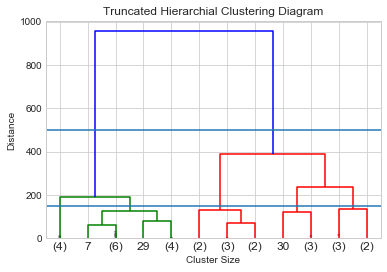

In [25]:
# dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15, show_contracted=True)
dendrogram(Z, truncate_mode='lastp', p=12, show_contracted=True)

plt.title('Truncated Hierarchial Clustering Diagram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=500)
plt.axhline(y=150)
plt.show()

## Generating hierarchical clusters

In [71]:
k=2

Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
Hclustering.fit(X)

accuracy_score(y, Hclustering.labels_)

0.78125

In [75]:
print(classification_report(y, Hclustering.labels_))

              precision    recall  f1-score   support

           0       0.86      0.63      0.73        19
           1       0.61      0.85      0.71        13

    accuracy                           0.72        32
   macro avg       0.73      0.74      0.72        32
weighted avg       0.76      0.72      0.72        32



In [72]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
Hclustering.fit(X)

accuracy_score(y, Hclustering.labels_)

0.78125

In [73]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='manhattan', linkage='average')
Hclustering.fit(X)

accuracy_score(y, Hclustering.labels_)

0.71875

In [50]:
cars[['am']].iloc[0].values

array([1])

In [51]:
Hclustering.labels_[0]

1

In [65]:
cars.iloc[:,9][24]

0

In [66]:
Hclustering.labels_[24]

0

In [67]:
cars.iloc[:,9][11] == Hclustering.labels_[11]

True

In [68]:
cars.iloc[:,9][30] == Hclustering.labels_[30]

False